# **Welcome to the Flag Recognizer Notebook!**

---



One particular day during my Summer 2019 Software Development internship, I entered the office dining area and noticed the magnetic flags placed on the fridge door. <br> <br>
There was one particular flag that I could not identify. Since there were no labels, I had to ask my colleague, and he replied "oh I don't know dude". <br> <br>

I realized that if I don't know a particular flag, I would have to look in an Atlas at all the flags until I recognize the one that matches the one on the fridge and could finally find its label. <br> <br>

I thought to myself: "**Wouldn't it be neat if there was someone who knew all the flags?**"

Thus was sparked this project: the Flag-Recognizer! 

If you're still curious, the flag I wanted to recognize was *Egypt*. 



To achieve this, I had to collect as many different images of various flags I could from the internet and feed them to a convolutional neural network. Since I had no prior experience achieving something like this, I used a pre-trained neural network, the ResNet34, to train my datasets. 

Future scheduled improvements include of course creating my own neural network for this task, expanding the dataset, and gradually increase the number of supported countries. Let's get into it! 

In [0]:
%%capture
#Download dataset. I have made the link to the images I collected publically available.
!wget 'https://www.dropbox.com/s/e066tp1nasyacn7/flag_data.zip?dl=1' -O flag_data.zip


In [0]:
#Initialization

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#Unzip data file.
!unzip -q flag_data.zip

replace flag_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
#Setting up batch size, image size, and path to dataset. 
bs = 64
sz = 224
PATH = './flag_data'

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [0]:
#Retrieving class names from the folder names

classes = []
for d in os.listdir(PATH):
  if os.path.isdir(os.path.join(PATH,d)) and not d.startswith('.'):
    classes.append(d)
print("Number of classes is {}", len(classes))
print(classes)

Number of classes is {} 7
['Italy', 'Egypt', 'Spain', 'Canada', 'United States', 'Morocco', 'Mexico']


In [0]:
#Check for corrupt files 
for c in classes:
  print("Class: ", c)
  verify_images(os.path.join(PATH,c),delete=True)

In [0]:
#Divide the dataset into 80% training data and 20% validation.
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [0]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 349 training images and 87 validation images.


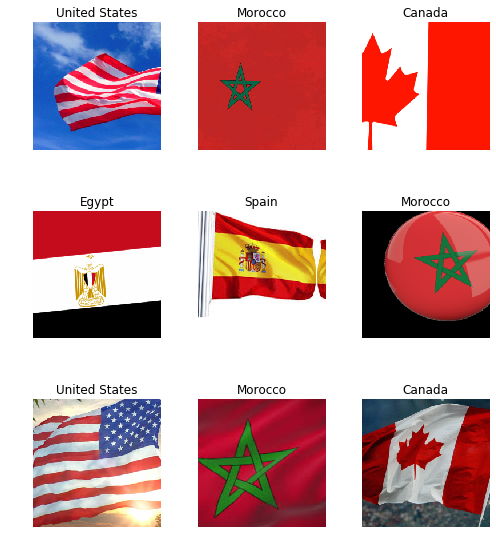

In [0]:
#Preview some images
data.show_batch(rows=3, figsize=(7,8))

In [0]:
#Build the convolutional neural network
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 47119936.56it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


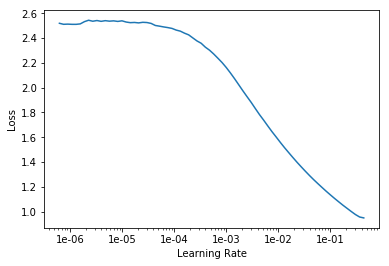

In [0]:
#Find appropriate learnign rate parameter
learn.lr_find()
learn.recorder.plot()

In [0]:
#We pick two learning rates, the 10x apart. We choose 1e-1 as it's right before we see a bit of loss and the one 10 smaller
learn.fit_one_cycle(4, max_lr=slice(1e-2,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.926095,0.873575,0.804598,00:22
1,0.485544,0.827377,0.873563,00:21
2,0.363248,0.592718,0.873563,00:22
3,0.283987,0.404301,0.965517,00:22


In [0]:
#We have achieved 96% accuracy!
#Let's interpret the results
interp = ClassificationInterpretation.from_learner(learn)

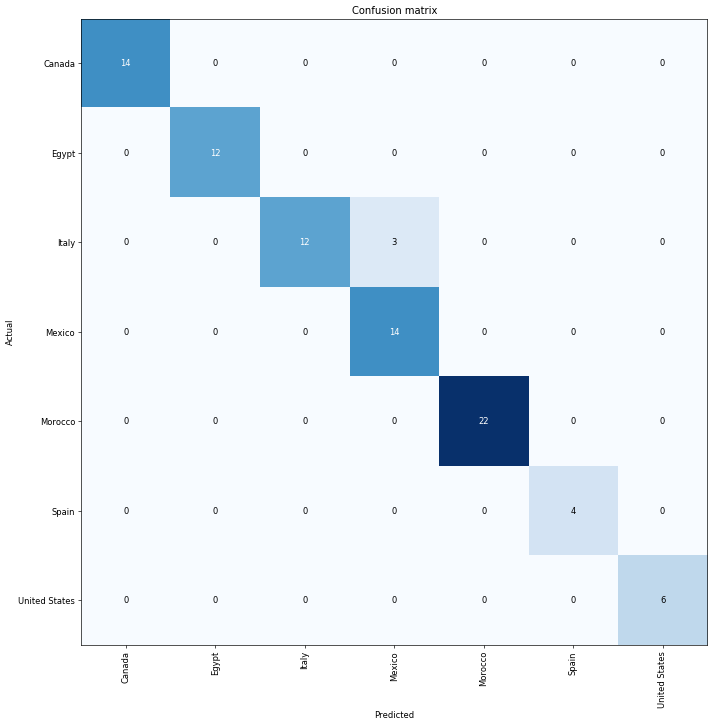

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

As we can see, our model seems to have trouble between Mexico and Italy. It makes sense since the colors are very similar! A larger dataset could probably help out in this case. 

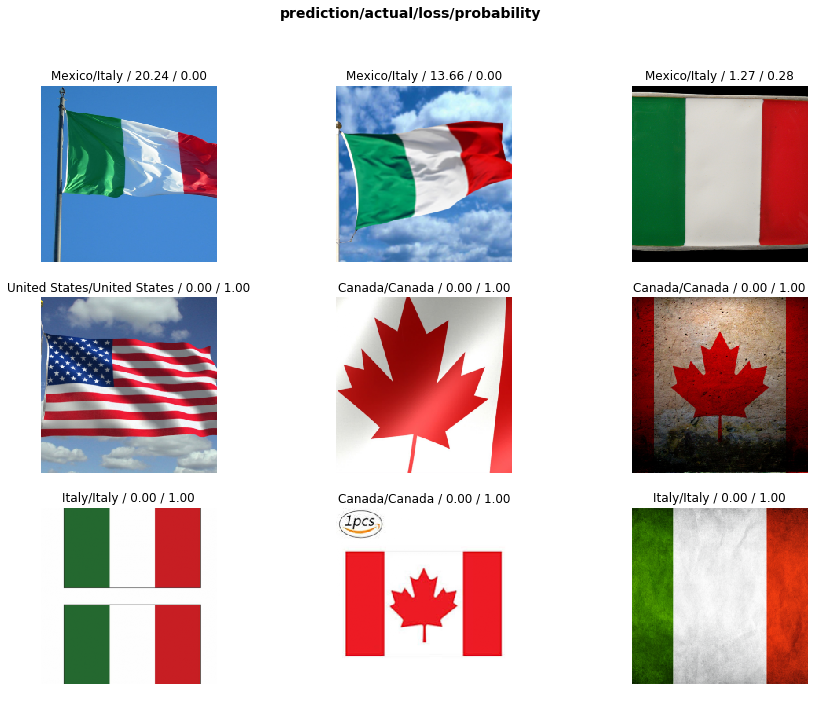

In [0]:
#Let's plot images with top losses. Top loss implies high confidence of wrong answer
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
#Let's export our model
learn.export()


###The model will be deployed `[flag-recognizer.onrender.com](https://flag-recognizer.onrender.com)` and will be posted in the [GitHub directory](https://https://github.com/Articho28/flag-recognizer). I will also try different models for the tasks and improve the dataset in the future. Feel free to share some of your thoughts! 

Thank you! 